In [2]:
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt


# Connect to the MySQL database
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='shubhamdb2002',
    database='eccomerce'
)
cursor = db.cursor()

# query

# unique customer city

In [68]:
query= """ select distinct customer_city from customers limit 50
"""

cursor.execute(query)
data=cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',)]

In [ ]:
# count the number of orders placed in 2017

In [3]:
query= """ select count(order_id) as total_orders from orders where year(order_purchase_timestamp)=2017"""

cursor.execute(query)
data=cursor.fetchall()
"total orders placed in 2017 are:",data[0][0]

('total orders placed in 2017 are:', 45101)

# find total sales per category

In [6]:
query= """ select products.productcategory, round(sum( payments.payment_value),2) from payments 
           join order_items  on payments.order_id=order_items.order_id
           join products on products.product_id=order_items.product_id
           group by products.productcategory """
cursor.execute(query)
data=cursor.fetchall()
df= pd.DataFrame(data ,columns=["category","sales"])
df

,category,sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


# calculate the percentage of orders that were paid in installments

In [21]:
query= """ select sum(case when payment_installments >= 1 then 1
                   else 0 end)/count(*)*100
                   from payments
                   """

cursor.execute(query)
data=cursor.fetchall()
"the percentage of orders that were paid in installments is ",data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# count the number of customers from each state

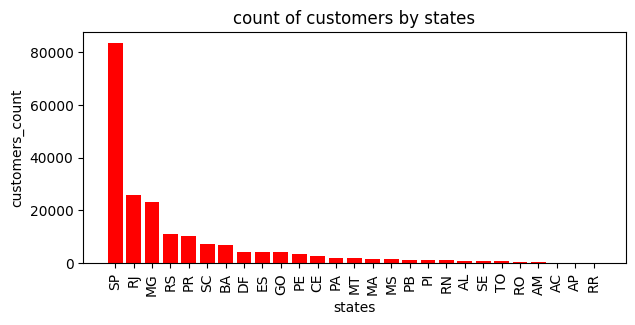

In [71]:
query= """ select count(customer_id),customer_state from customers group by customer_state """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["customer_id","state"])
df=df.sort_values(by ="customer_id", ascending=False)
plt.figure(figsize =(7,3))
plt.bar(df["state"],df["customer_id"],color="red")
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("customers_count")
plt.title("count of customers by states")
plt.show()

# calculate the number of orders per month in 2018

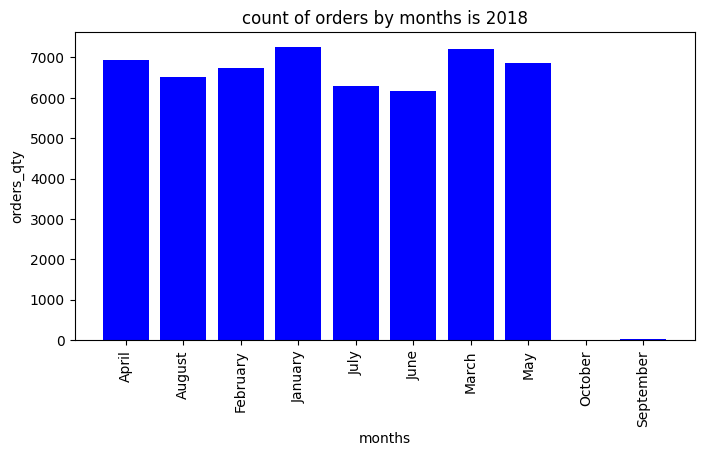

In [101]:
query= """ select monthname(order_purchase_timestamp) as month, count(order_id) from orders where year(order_purchase_timestamp)=2018 group by monthname(order_purchase_timestamp) order by month asc  """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["Month","Order_qty"])
plt.figure(figsize =(8,4))
plt.bar(df["Month"],df["Order_qty"],color="blue" )
plt.xlabel("months")
plt.ylabel("orders_qty")
plt.title("count of orders by months is 2018")

plt.xticks(rotation=90)
plt.show()

# find the average number of products per order, grouped by customer city.

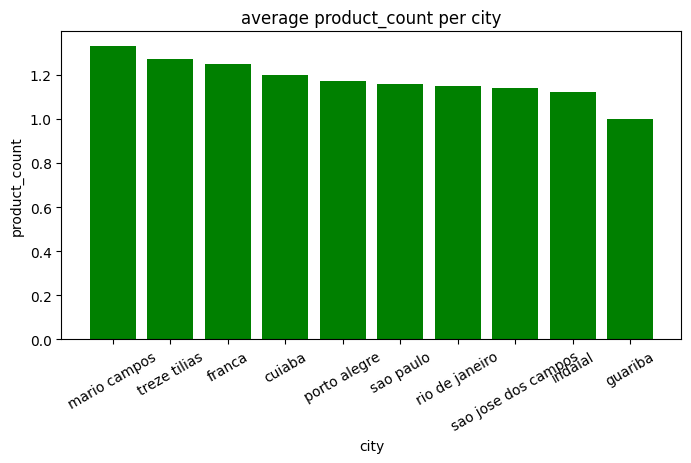

In [85]:
query= """ with countorders as 
                   (select orders.order_id,orders.customer_id,count(order_items.order_id)as oc from orders
                   join order_items on orders.order_id=order_items.order_id
                   group by orders.order_id,orders.customer_id)
                   
                   select customers.customer_city,round(avg(countorders.oc),2) as avg_productscount 
                   from customers join countorders on customers.customer_id=countorders.customer_id
                   group by customers.customer_city"""

cursor.execute(query)
data=cursor.fetchall()

df=pd.DataFrame(data,columns=["city","product_count"])
df=df.head(10)
df=df.sort_values( by ="product_count", ascending=False)
plt.figure(figsize =(8,4))
plt.bar(df["city"],df["product_count"],color="green" )
plt.xlabel("city")
plt.ylabel("product_count")
plt.title("average product_count per city")

plt.xticks(rotation=30)
plt.show()

# calculate the percentage of total revenue contributed by each product category

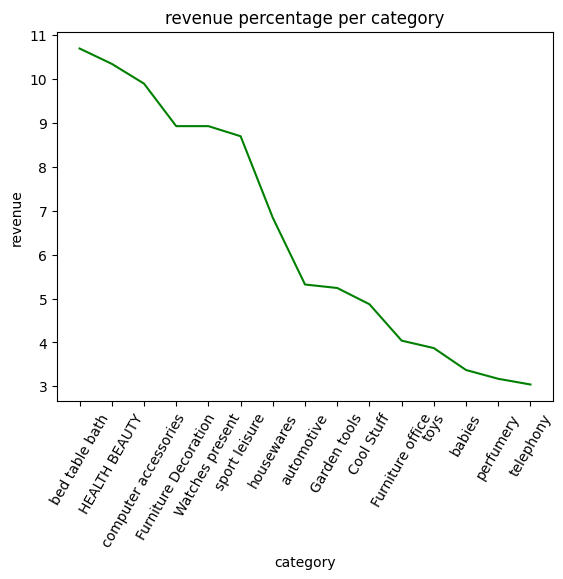

In [100]:
query= """ select products.productcategory, round(sum( payments.payment_value)/(select sum(payment_value)from payments)*100,2) as revenue from payments 
           join order_items  on payments.order_id=order_items.order_id
           join products on products.product_id=order_items.product_id
           group by products.productcategory  order by revenue desc"""
cursor.execute(query)
data=cursor.fetchall()
df= pd.DataFrame(data ,columns=["category","revenue"])
df=df.head(15)
plt.plot(df["category"],df["revenue"],color="green" )
plt.xlabel("category")
plt.ylabel("revenue")
plt.title("revenue percentage per category")

plt.xticks(rotation=60)
plt.show()

#  Identify the correlation between product price and the number of times a product has been purchased

In [125]:
import numpy as np
query= """ select products.productcategory,count(order_items.product_id),round(avg(order_items.price),2)
           from products join order_items on products.product_id=order_items.product_id
           group by products.productcategory
"""
cursor.execute(query)
data=cursor.fetchall()

df= pd.DataFrame(data ,columns=["category","order_count","price_avg"])
# df=df.head(15)
arr1=df["order_count"]
arr2=df["price_avg"]
a=np.corrcoef([arr1,arr2])
print("the correlation between price and the number of times product has been purchased is:",a[0][1])

the correlation between price and the number of times product has been purchased is: -0.10631514167157562


# calculate the total revenue generated by each seller, and rank them by revenue.

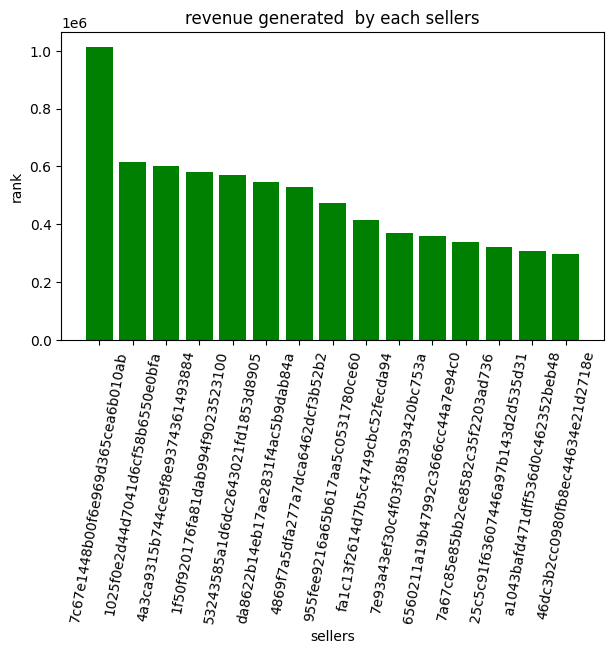

In [143]:
query= """ select * ,dense_rank() over(order by rev desc) as rn from (select order_items.seller_id,round(sum(payments.payment_value),2) as rev from order_items join payments on 
           order_items.order_id=payments.order_id group by order_items.seller_id ) as a
"""
cursor.execute(query)
data=cursor.fetchall()
df= pd.DataFrame(data ,columns=["seller_id","revenue","rank"])
df=df.head(15)

plt.figure(figsize =(7,4))
plt.bar(df["seller_id"],df["revenue"],color="green" )
plt.xlabel("sellers")
plt.ylabel("rank")
plt.title("revenue generated  by each sellers")
plt.xticks(rotation=80)
plt.show()


# calculate the moving average of order values for each customer over their order history.

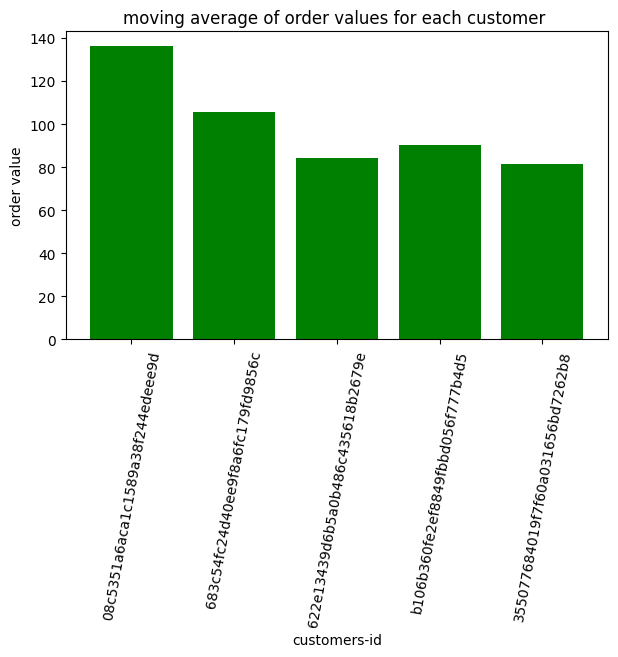

In [36]:
query= """ select customer_id,order_purchase_timestamp,avg(payment) over( order by order_purchase_timestamp) as moving_avg
          from
          (select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment
            from payments join orders on payments.order_id=orders.order_id) as a
"""
cursor.execute(query)
data=cursor.fetchall()
# data
df= pd.DataFrame(data ,columns=["customer_id","timestamp","moving_avg"])
df=df.head(10)
plt.figure(figsize =(7,4))
plt.bar(df["customer_id"],df["moving_avg"],color="green" )
plt.xlabel("customers-id")
plt.ylabel("order value")
plt.title("moving average of order values for each customer ")
plt.xticks(rotation=80)
plt.show()


# Calculate the cumulative sales per month for each year

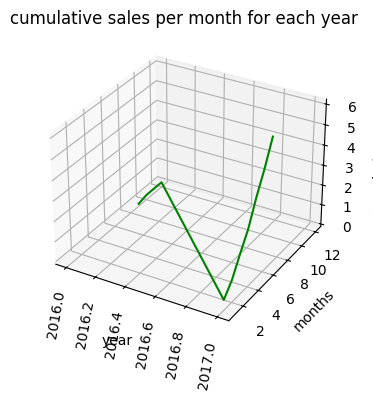

In [44]:
from mpl_toolkits.mplot3d import Axes3D
query=""" select years,months,sum(payment) over(order by years,months)  culumativ from
          ( select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months,
            round(sum(payments.payment_value),2) as payment from orders join payments on orders.order_id=payments.order_id
            group by years, months order by years, months) as a"""
cursor.execute(query)
data=cursor.fetchall()
df= pd.DataFrame(data ,columns=["year","month","cumulative_sales"])
df=df.head(10)
fig=plt.figure(figsize =(7,4))
ax=fig.add_subplot(111,projection='3d')
ax.plot(df["year"],df["month"],df["cumulative_sales"],color="green" )
ax.set_xlabel("year")
ax.set_ylabel("months")
ax.set_zlabel("cumulative_sales")
ax.set_title("cumulative sales per month for each year ")
ax.tick_params(axis='x',rotation=80)
plt.show()